<center>
<img src="../../img/ods_stickers.jpg">
    
## [mlcourse.ai](https://mlcourse.ai) - Open Machine Learning Course

Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline/). Translated and edited by [Sergey Isaev](https://www.linkedin.com/in/isvforall/), [Artem Trunov](https://www.linkedin.com/in/datamove/), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina/), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/). All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

**In this task you should use Pandas to answer a few questions about the [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) dataset. (You don't have to download the data – it's already  in the repository)**

Unique values of all features (for more information, please see the links above):
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('../data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**1. How many men and women (*sex* feature) are represented in this dataset?** 

In [7]:
# You code here
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**2. What is the average age (*age* feature) of women?**

In [8]:
# You code here
data[data['sex']=='Female']['age'].mean()

36.85823043357163

**3. What is the percentage of German citizens (*native-country* feature)?**

In [9]:
# You code her
country_profile = data['native-country'].value_counts(normalize = True)
country_profile['Germany']*100

print("Percentage of Germans = %f %%" %(country_profile['Germany']*100))

Percentage of Germans = 0.420749 %


**4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (*salary* feature) and those who earn less than 50K per year? **

In [10]:
# You code here
col = ['age']
data.groupby('salary')[col].agg([np.mean, np.std])

age           
             mean        std
salary                      
<=50K   36.783738  14.020088
>50K    44.249841  10.519028

**6. Is it true that people who earn more than 50K have at least high school education? (*education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* or *Doctorate* feature)**

In [11]:
# You code here


pd.crosstab(data['salary'], data['education'], margins=True)



education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,All
salary,,,,,,,,,,,,,,,,,
<=50K,871,1115,400,162,317,606,487,802,1021,3134,107,8826,764,51,153,5904,24720
>50K,62,60,33,6,16,40,27,265,361,2221,306,1675,959,0,423,1387,7841
All,933,1175,433,168,333,646,514,1067,1382,5355,413,10501,1723,51,576,7291,32561


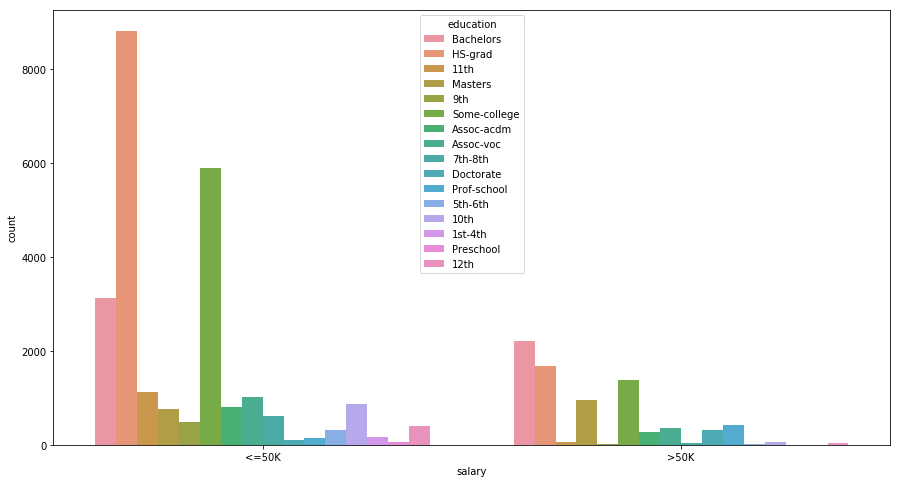

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(x='salary', hue='education', data=data);
#sns.set(rc={'figure.figsize':(11.7,8.27)})

It can be observed from the plot that there are even high school grads (HS-grads) who are drawing a salary greater than 50K. Even after obtaining higher education, most people draw a salary less than 50K. It doesnt look like investing in higher education ensures a higher salary

**7. Display age statistics for each race (*race* feature) and each gender (*sex* feature). Use *groupby()* and *describe()*. Find the maximum age of men of *Amer-Indian-Eskimo* race.**

In [13]:
# You code here

filt = data.groupby(['race','sex'])[col].describe()
filt.loc[['Amer-Indian-Eskimo']]

age                                          \
                           count       mean        std   min   25%   50%   
race               sex                                                     
Amer-Indian-Eskimo Female  119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male    192.0  37.208333  12.049563  17.0  28.0  35.0   

                                       
                            75%   max  
race               sex                 
Amer-Indian-Eskimo Female  46.0  80.0  
                   Male    45.0  82.0

In [14]:
print("Max age of Amer-Indian-Eskimo race = %f" %(filt.loc[['Amer-Indian-Eskimo']].iloc[1,7]))

Max age of Amer-Indian-Eskimo race = 82.000000


**8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (*marital-status* feature)? Consider as married those who have a *marital-status* starting with *Married* (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.**

In [15]:
# Adding a new column 'married' which is true if the person is married
data['married']=  data['marital-status'].apply(lambda x: True if ( (x == "Married-civ-spouse" )|( x == "Married-spouse-absent") |( x == "Married-AF-spouse")) else False)

#Adding a new column 'marital status =sex' that takes on 4 combination Married male, Unmarried male, Married Female, Unmarried Female
data.loc[(data['married'] == True) & (data['sex'] == 'Male'), 'marital status - Sex'] = 'Married -Male'  
data.loc[(data['married'] == True) & (data['sex'] == 'Female'), 'marital status - Sex'] = 'Married -Female' 
data.loc[(data['married'] == False) & (data['sex'] == 'Male'), 'marital status - Sex'] = 'Unmarried - Male' 
data.loc[(data['married'] == False) & (data['sex'] == 'Female'), 'marital status - Sex'] =   'Unmarried -Female' 
pd.crosstab( data['married'] , data['salary'], margins = True)

salary,<=50K,>50K,All
married,,,
False,16039,1105,17144
True,8681,6736,15417
All,24720,7841,32561


In [16]:
pd.crosstab(  data['marital status - Sex'] , data['salary'], margins = True)

salary,<=50K,>50K,All
marital status - Sex,,,
Married -Female,1105,771,1876
Married -Male,7576,5965,13541
Unmarried - Male,7552,697,8249
Unmarried -Female,8487,408,8895
All,24720,7841,32561


In the >50K salary bracket, there are significantly more married men than single men

**9. What is the maximum number of hours a person works per week (*hours-per-week* feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?**

In [17]:
# You code here

max_hours = data['hours-per-week'].max()
num_people_working_max_hours  = len( data[(data['hours-per-week'] == max_hours)])
num_people_working_max_hours_salary_above50K  = len(data[(data['hours-per-week'] == max_hours) & (data['salary']=='>50K')].index)
percent_people_working_max_hours_salary_above50K = num_people_working_max_hours_salary_above50K/num_people_working_max_hours * 100

print("Maximum number of hours a person works pe(r week: %d" %(max_hours ))
print("Many people work such a number of hours: %d" %(num_people_working_max_hours))
print("People earning more than 50K comprises of %d percent of this group"%( percent_people_working_max_hours_salary_above50K))

Maximum number of hours a person works pe(r week: 99
Many people work such a number of hours: 85
People earning more than 50K comprises of 29 percent of this group


**10. Count the average time of work (*hours-per-week*) for those who earn a little and a lot (*salary*) for each country (*native-country*). What will these be for Japan?**

In [18]:
# You code here
#data.pivot_table(['hours-per-week','salary'],
          #     ['native-country'], aggfunc='mean')
columns_to_show = ['hours-per-week']
grouped = data.groupby(['native-country','salary'])[columns_to_show].agg([np.mean])
grouped


hours-per-week
                                mean
native-country salary               
?              <=50K       40.164760
               >50K        45.547945
Cambodia       <=50K       41.416667
               >50K        40.000000
Canada         <=50K       37.914634
...                              ...
United-States  >50K        45.505369
Vietnam        <=50K       37.193548
               >50K        39.200000
Yugoslavia     <=50K       41.600000
               >50K        49.500000

[82 rows x 1 columns]

In [19]:
grouped.loc['Japan']

,hours-per-week
,mean
salary,
<=50K,41.000000
>50K,47.958333


In [20]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,married,marital status - Sex
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,False,Unmarried - Male
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,True,Married -Male
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,False,Unmarried - Male
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,True,Married -Male
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,True,Married -Female
